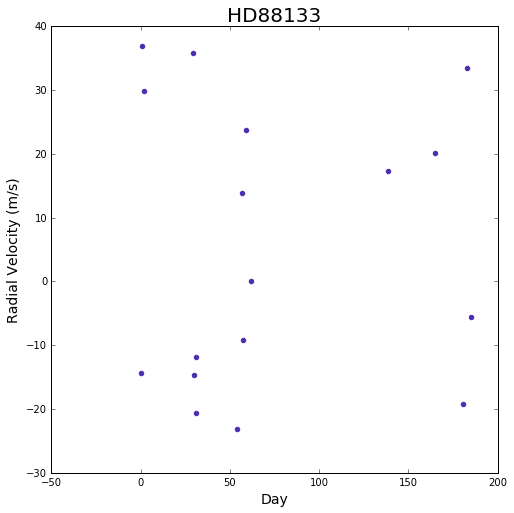

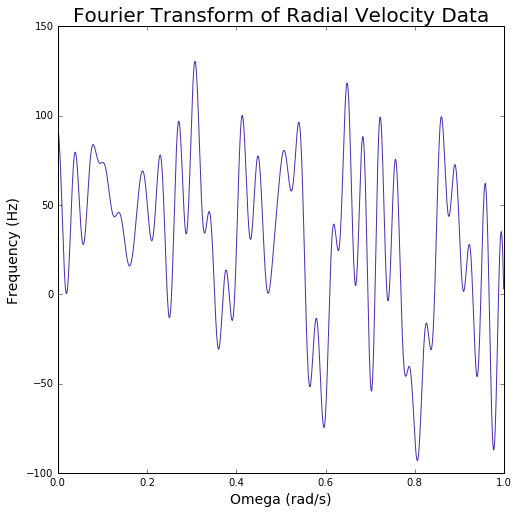

HD88133 
Star Mass (Solar Masses): 1.2 
Period (Days): 3.40 
Eccentricity: 0.11 
Semi-Major Axis (AU): 0.047 
Exoplanet Mass (Jupiter Masses): 0.23 



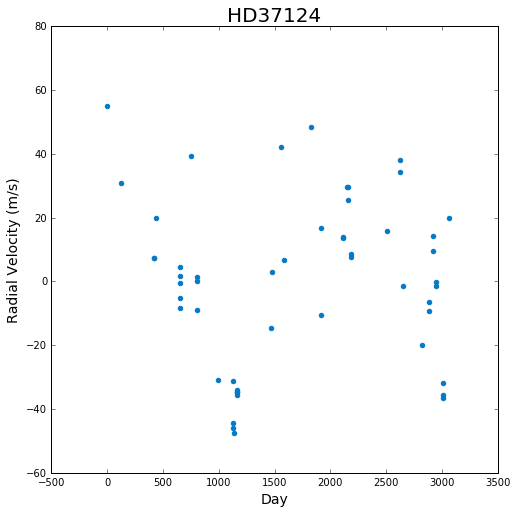

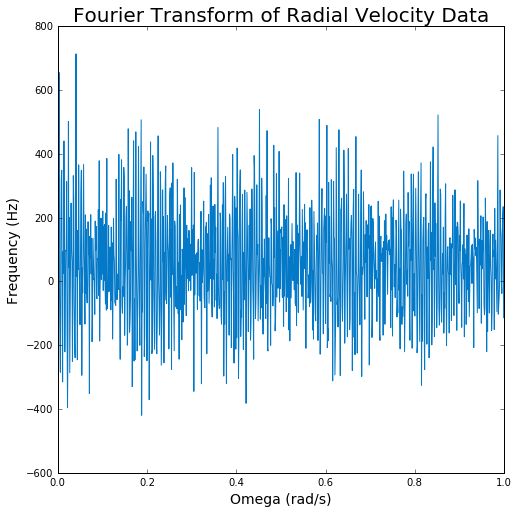

HD37124 
Star Mass (Solar Masses): 0.85 
Period (Days): 153.25 
Eccentricity: 0.053 
Semi-Major Axis (AU): 0.531 
Exoplanet Mass (Jupiter Masses): 0.61 

Other Detected Planets: 
Period (Days): 2094.00 
Eccentricity: 0.2 
Semi-Major Axis (AU): 3.035 
Exoplanet Mass (Jupiter Masses): 0.71 

Period (Days): 834.05 
Eccentricity: 0.14 
Semi-Major Axis (AU): 1.643 
Exoplanet Mass (Jupiter Masses): 0.53


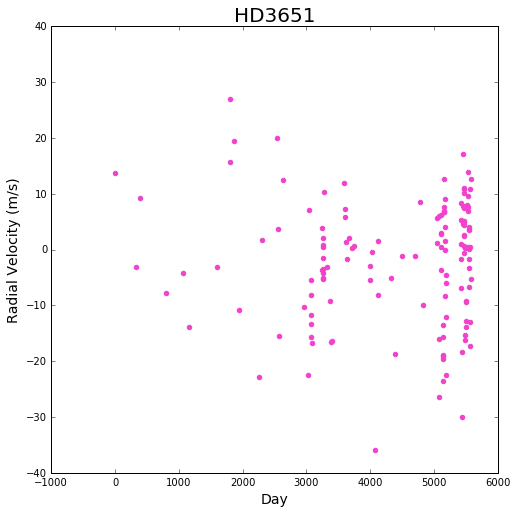

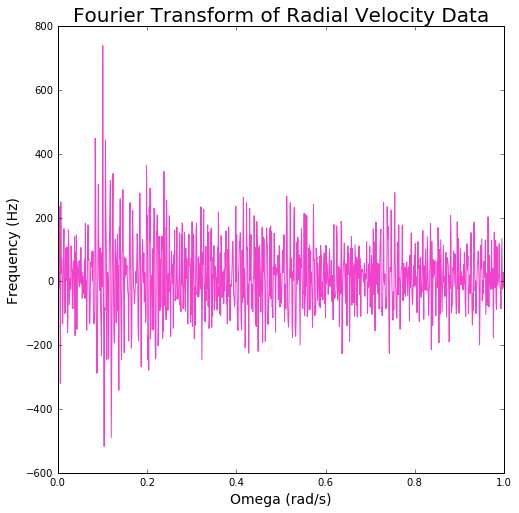

HD3651 
Star Mass (Solar Masses): 0.76 
Period (Days): 62.21 
Eccentricity: 0.63 
Semi-Major Axis (AU): 0.280 
Exoplanet Mass (Jupiter Masses): 0.20 



In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

values = []
omega = np.arange(0,1,.001)
G = 6.67408e-11
Ms = 1.989e30
Mj = 1.898e27

f = open('exoplanet_RV.dat') #opens text file
lines = f.readlines() #gets data lines
f.close() #closes text file

def randomHexColor(): #generates a random color for pretty graphs
    return "#%06x" % random.randint(0, 0xFFFFFF)

def fourierTrans(x,y,k): #fourier transform function
    trans = []
    for i in range(len(y)):
        trans.append(y[i]*(np.cos(k*x[i])))
    return sum(trans)

def mToAU(meter):
    return meter*(6.68459e-12) #converst m to AU


class Star:
    def __init__(self,name,factor,pFactor,eccentricity, vals): #sets basic values for star
        self.name = name
        self.mass = Ms*factor #gets mass in kg
        self.pFactor = pFactor #gets correction factor for period
        self.eccentricity = eccentricity
        self.days = (vals[0]-vals[0][0]).flatten() #scales Julian Days to normal days starting at 0
        self.radialVelocities = vals[1].flatten() #makes 1 dimensional array of RV data
        self.stdDevs = vals[2].flatten()
        self.frequencies = fourierTrans(self.days,self.radialVelocities,omega) #gets frequencies by Fourier Transforming data
        self.period = 2*86400*np.pi/omega[np.argmax(self.frequencies)] #gets period (in seconds) from omega
        self.velocityAmp = (max(self.radialVelocities)-min(self.radialVelocities))/4 #calculates semi-amplitude
        self.semiMajorAxis = mToAU(self.getAFromP()) #gets semi-major axis length in AU from period
        self.latisRectum = self.semiMajorAxis*(1-self.eccentricity**2) #gets latis rectum of orbit
        self.semiMinorAxis = self.latisRectum/(np.sqrt(1-self.eccentricity**2)) #gets semi-minor axis of orbit
        self.rMax = self.latisRectum/(1-self.eccentricity) #finds max distance in orbit
        self.rMin = self.semiMajorAxis - self.rMax #finds min distance in orbit
        self.ind = np.argpartition(self.frequencies, -3)[-3:] #finds three largest frequencies to find periods
    def makePlot(self):
        clr = randomHexColor()
        plt.figure(figsize=(8,8)) #sets up plot
        plt.scatter(self.days,self.radialVelocities,label=self.name,color=clr) #graphs scatter plot of given data
        plt.title(self.name,fontsize=20)  #labels graph
        plt.ylabel("Radial Velocity (m/s)",fontsize=14)
        plt.xlabel("Day",fontsize=14)
        fig = plt.figure(figsize=(8,8)) #makes plot for Fourier Transformed Data
        plt.plot(omega,self.frequencies,color=clr) #graphs data
        plt.title("Fourier Transform of Radial Velocity Data",fontsize=20) #labels graph
        plt.xlabel("Omega (rad/s)",fontsize=14)
        plt.ylabel("Frequency (Hz)",fontsize=14)
        plt.legend()
        plt.show()
        self.printInfo()
    def getAFromP(self):
        return ((G*self.mass*((self.period/self.pFactor)**2))/(4*(np.pi**2)))**(1./3) #uses period and Kepler's third law to return semi major axis from period
    def planetMass(self):
        return self.velocityAmp*((self.period*(self.mass**2)/(2*np.pi*G))**(1./3))*np.sqrt(1-self.eccentricity**2)/(Mj) #uses semi-amplitude, period, mass, and eccentricity to find mass of planet
    def secondPlanetCalculations(self): #special for 37124, same technique as before but for second largest spike on frequency graph
        self.period2 = 86400*2*np.pi/omega[self.ind[1]]
        self.semiMajorAxis2 = mToAU(((G*self.mass*((self.period2)**2))/(4*(np.pi**2)))**(1./3))
        self.planetMass2 = self.velocityAmp*((self.period2*(self.mass**2)/(2*np.pi*G))**(1./3))*np.sqrt(1-(.2)**2)/(Mj*2)
        return
    def thirdPlanetCalculations(self):  #special for 37124, same technique as before but for third largest spike on frequency graph
        self.period3 = 60*86400*2*np.pi/omega[self.ind[0]]
        self.semiMajorAxis3 = mToAU(((G*self.mass*((self.period3)**2))/(4*(np.pi**2)))**(1./3))
        self.planetMass3 = self.velocityAmp*((self.period3*(self.mass**2)/(2*np.pi*G))**(1./3))*np.sqrt(1-(.14)**2)/(Mj*2)
    def printInfo(self): #prints relevant information
        print self.name,"\nStar Mass (Solar Masses):",self.mass/Ms,"\nPeriod (Days):","{0:.2f}".format(round(self.period/(86400*self.pFactor),2)),\
        "\nEccentricity:",self.eccentricity,"\nSemi-Major Axis (AU):","{0:.3f}".format(round(self.semiMajorAxis,5)),"\nExoplanet Mass (Jupiter Masses):",\
        "{0:.2f}".format(round(self.planetMass(),2)),"\n"
        if self.name == "HD37124":
            self.secondPlanetCalculations()
            self.thirdPlanetCalculations()
            print "Other Detected Planets:","\nPeriod (Days):","{0:.2f}".format(round(self.period2/86400),2),\
            "\nEccentricity:",.2,"\nSemi-Major Axis (AU):","{0:.3f}".format(round(self.semiMajorAxis2,5)),"\nExoplanet Mass (Jupiter Masses):",\
            "{0:.2f}".format(round(self.planetMass2,2)),"\n\nPeriod (Days):","{0:.2f}".format(round(self.period3/86400,2)),\
            "\nEccentricity:",.14,"\nSemi-Major Axis (AU):","{0:.3f}".format(round(self.semiMajorAxis3,5)),"\nExoplanet Mass (Jupiter Masses):",\
            "{0:.2f}".format(round(self.planetMass3,2))
            
for line in lines: #goes through lines and appends data to values array
    p = line.split()
    values.append(p)
locs = [] #finds indices that divide up data for different stars
for val in values:
    if len(val) == 2:
        locs.append(values.index(val))

#initializes each star with correct data
HD88133 = Star('HD88133',1.2,6,0.11,np.hsplit(np.array(values[locs[0]+1:locs[1]-1],dtype="float"),3)) 
HD37124 = Star('HD37124',.85,1,0.053,np.hsplit(np.array(values[locs[1]+1:locs[2]-2],dtype="float"),3))
HD3651 = Star('HD3651',.76,1,0.63,np.hsplit(np.array([x[:3] for x in values[locs[2]+1:]],dtype="float"),3))

#plots data for each star
HD88133.makePlot()
HD37124.makePlot()
HD3651.makePlot()

